In [1]:
import pandas as pd
import requests
from bs4 import BeautifulSoup

In [2]:
url='http://nagyvofely.hu/Budapest/irszam'
res = requests.get(url)
res = BeautifulSoup(res.content,'lxml')

data = res.findAll('fieldset')

In [3]:
postal_code=[d.find('a').text for d in data]
district=[d.find('a')['title'].replace(' ', '').split(',')[1].split('.')[0] for d in data]

In [4]:
df=pd.DataFrame()
df['PostalCode']=postal_code
df['Neighborhood']=district
df.tail(10)

,PostalCode,Neighborhood
151,1214,XXI
152,1215,XXI
153,1221,XXII
154,1222,XXII
155,1223,XXII
156,1224,XXII
157,1225,XXII
158,1237,XXIII
159,1238,XXIII
160,1239,XXIII


In [ ]:
url_temp='https://xn--irnytszmok-t4af6mnd.cybo.com/magyarorsz%C3%A1g/postal_budapest-x.-ker%C3%BClet/'

lat=[]
lon=[]
latlon=pd.DataFrame()

for postal in df['PostalCode'][0:9]:
    url=url_temp.replace('postal', str(postal))

    res = requests.get(url, headers=headers)
    res = BeautifulSoup(res.content,'lxml')
    tables=res.findAll('table')
    if(len(tables)!=0):
        table=tables[0]
        rows=table.findAll('tr')

        for r in rows:
            cells=r.findAll('td')
            if cells[0].text=='Koordináták':
                coords=cells[1].text.split('/')
                lat.append(coords[0].replace('°','').replace(' ', ''))
                lon.append(coords[1].replace('°','').replace(' ',''))
    else:
        print(postal)

In [ ]:
df['Borough.Latitude']=lat
df['Borough.Longitude']=lon
df.head()

In [5]:
url='https://en.m.wikipedia.org/wiki/List_of_districts_in_Budapest'

#res=requests.get(url)
#res=BeautifulSoup(res.content, 'lxml')
#table=res.find('table')
df2=pd.read_html(url, skiprows=1)[0]
df2.head()

,0,1,2,3
0,I.,Várkerület(Castle District),"Buda Castle, Tabán, Gellérthegy, Krisztinaváro...","Buda Castle, Matthias Church, Hungarian Nation..."
1,II.,none,"Adyliget, Budakeszierdő, Budaliget, Csatárka, ...","Tomb of Gül Baba, Mechwart Park, Cave of Szeml..."
2,III.,Óbuda-Békásmegyer,"Óbuda, Aquincum, Aranyhegy, Békásmegyer, Csill...","Ruins of Aquincum, Aquincum Military Amphithea..."
3,IV.,Újpest(New Pest),"Újpest, Megyer, Káposztásmegyer, Székesdűlő, I...","Queen of Heavens Church, Synagogue of Újpest, ..."
4,V.,Belváros-Lipótváros(Inner City-Leopold Town),"Inner City, Lipótváros","Parliament, Hungarian Academy of Sciences, Gre..."


In [6]:
df3=pd.DataFrame() 
df3['Neighborhood']=df2[0].apply(lambda x: x.replace('.','').replace(' kerület',''))
df3['Borough']=df2[2]
df3.drop(df3.index[-1], inplace=True)
df3.head()

,Neighborhood,Borough
0,I,"Buda Castle, Tabán, Gellérthegy, Krisztinaváro..."
1,II,"Adyliget, Budakeszierdő, Budaliget, Csatárka, ..."
2,III,"Óbuda, Aquincum, Aranyhegy, Békásmegyer, Csill..."
3,IV,"Újpest, Megyer, Káposztásmegyer, Székesdűlő, I..."
4,V,"Inner City, Lipótváros"


In [7]:
coords='47.4979° N, 19.0402° E, 47.5393° N, 18.9869° E, 47.5672° N, 19.0369° E, 47.5649° N, 19.0913° E, 47.5002° N, 19.0520° E, 47.5099° N, 19.0626° E, 47.5027° N, 19.0734° E, 47.4894° N, 19.0707° E, 47.4649° N, 19.0916° E, 47.4833° N, 19.1573° E, 47.4593° N, 19.0187° E, 47.4991° N, 18.9905° E, 47.5355° N, 19.0709° E, 47.5225° N, 19.1147° E, 47.5589° N, 19.1193° E, 47.5183° N, 19.1919° E, 47.4803° N, 19.2667° E, 47.4281° N, 19.2098° E, 47.4457° N, 19.1430° E, 47.4333° N, 19.1193° E, 47.4244° N, 19.0661° E, 47.4250° N, 19.0317° E, 47.3940° N, 19.1225° E'
coords=coords.replace('° E', '').replace('° N', '').split(', ')
df3['Neighborhood.Latitude']=coords[::2]
df3['Neighborhood.Longitude']=coords[1::2]
df3

,Neighborhood,Borough,Neighborhood.Latitude,Neighborhood.Longitude
0,I,"Buda Castle, Tabán, Gellérthegy, Krisztinaváro...",47.4979,19.0402
1,II,"Adyliget, Budakeszierdő, Budaliget, Csatárka, ...",47.5393,18.9869
2,III,"Óbuda, Aquincum, Aranyhegy, Békásmegyer, Csill...",47.5672,19.0369
3,IV,"Újpest, Megyer, Káposztásmegyer, Székesdűlő, I...",47.5649,19.0913
4,V,"Inner City, Lipótváros",47.5002,19.0520
5,VI,Terézváros,47.5099,19.0626
6,VII,Erzsébetváros,47.5027,19.0734
7,VIII,"Józsefváros, Kerepesdűlő, Tisztviselőtelep",47.4894,19.0707
8,IX,"Ferencváros, Gubacsidűlő, József Attila-lakótelep",47.4649,19.0916
9,X,"Felsőrákos, Gyárdűlő, Keresztúridűlő, Kőbánya-...",47.4833,19.1573


In [8]:
merged = pd.merge(left=df3, right=df, left_on='Neighborhood', right_on='Neighborhood')
merged.tail()

,Neighborhood,Borough,Neighborhood.Latitude,Neighborhood.Longitude,PostalCode
156,XXII,"Budatétény, Nagytétény, Budafok",47.4250,19.0317,1224
157,XXII,"Budatétény, Nagytétény, Budafok",47.4250,19.0317,1225
158,XXIII,Soroksár,47.3940,19.1225,1237
159,XXIII,Soroksár,47.3940,19.1225,1238
160,XXIII,Soroksár,47.3940,19.1225,1239


In [9]:
!pip install folium==0.5.0
#!conda install -c conda-forge folium
#!conda install -c conda-forge folium=0.5.0 --yes
import folium

     |████████████████████████████████| 81kB 6.1MB/s eta 0:00:011
  Stored in directory: /home/dsxuser/.cache/pip/wheels/f8/98/ff/954791afc47740d554f0d9e5885fa09dd60c2265d42578e665
Successfully built folium


In [10]:
bp_lat=47.48
bp_lon=19.13

line_points=[
    (47.3850,19.0320),
    (47.5850,19.0580)
]

map=folium.Map(location=[bp_lat, bp_lon], zoom_start=11)

folium.PolyLine(line_points, color='blue', weight=5, opacity=1).add_to(map)

folium.map.Marker(
    [47.5850, 19.0200],
    icon=folium.DivIcon(
        icon_size=(15,15),
        icon_anchor=(0,0),
        html='<b style="font-size: 16pt;">Buda</b>'
        )
    ).add_to(map)
folium.map.Marker(
    [47.5850, 19.0600],
    icon=folium.DivIcon(
        icon_size=(15,15),
        icon_anchor=(0,0),
        html='<b style="font-size: 16pt;">Pest</b>',
        )
    ).add_to(map)

for lat , lon, label in zip(df3['Neighborhood.Latitude'], df3['Neighborhood.Longitude'], df3['Neighborhood']):
    label=folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [float(lat), float(lon)], 
        radius=5,
        color='red',
        popup=label,
        fill=True,
        fill_color='#500000',
        fill_opacity=0.7,
        parse_html=False
    ).add_to(map)

map

In [11]:
CLIENT_ID='YOUR_ID'
CLIENT_SECRET='YOUR_SECRET'
VERSION='20180605'
LIMIT=300
RADIUS=1000

In [12]:
# The code was removed by Watson Studio for sharing.

In [43]:
def getNearbyVenues(names, lats, lons):
    list=[]
    for n, la, lo in zip(names, lats, lons):
        url= 'https://api.foursquare.com/v2/venues/explore?client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, VERSION, la, lo, RADIUS, LIMIT)
        results= requests.get(url).json()['response']['groups'][0]['items']
        sublist=[]
        for v in results:
            if v['venue']['categories'][0]['name'] not in ['Bus Stop', 'Bus Station','Tram Station',' Train Station', 'Grocery Store', 'Coffee Shop']:
                sublist.append([
                    n, 
                    la, 
                    lo, 
                    v['venue']['name'], 
                    v['venue']['location']['lat'], 
                    v['venue']['location']['lng'], 
                    v['venue']['categories'][0]['name']
                ])
        list.append(sublist)
                
    
    nearby=pd.DataFrame([item for vlist in list for item in vlist])
    nearby.columns=[
     'Neighborhood',
     'Neighborhood Latitude', 
     'Neighborhood Longitude',
     'Venue',
     'Venue Latitude',
     'Venue Longitude', 
     'Venue Category'
    ]

    return(nearby)

In [44]:
venues=getNearbyVenues(
  names=df3['Neighborhood'],
  lats=df3['Neighborhood.Latitude'],
  lons=df3['Neighborhood.Longitude']
)
print(venues.shape)

(982, 7)


In [45]:
onehot=pd.get_dummies(venues[['Venue Category']], prefix="", prefix_sep="")
onehot['Neighborhood']=venues['Neighborhood']
fixed_columns=[onehot.columns[-1]]+list(onehot.columns[:-1])
onehot=onehot[fixed_columns]
grouped=onehot.groupby('Neighborhood').mean().reset_index()
print(grouped.shape)

(23, 211)


In [46]:
def most_common_venues(row, top):
    row_categories=row.iloc[1:]
    row_categories_sorted= row_categories.sort_values(ascending=False)
    return row_categories_sorted.index.values[0:top]

In [47]:
import numpy as np

In [48]:
top=5
indicators=['st', 'nd', 'rd']
columns=['Neighborhood']
for ind in np.arange(top):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicator[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

sorted=pd.DataFrame(columns=columns)
sorted['Neighborhood']=grouped['Neighborhood']

for ind in np.arange(grouped.shape[0]):
    sorted.iloc[ind, 1:]=most_common_venues(grouped.iloc[ind, :],top)

sorted.head()

,Neighborhood,1th Most Common Venue,2th Most Common Venue,3th Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,I,Hotel,Hungarian Restaurant,Plaza,Scenic Lookout,Pub
1,II,Park,Tennis Court,Athletics & Sports,Scenic Lookout,Playground
2,III,Electronics Store,Deli / Bodega,Auto Garage,Mountain,Fast Food Restaurant
3,IV,Fast Food Restaurant,Bakery,Dessert Shop,Café,Park
4,IX,Furniture / Home Store,Soccer Field,Train Station,Gym / Fitness Center,Multiplex


In [23]:
from sklearn.cluster import KMeans
!pip install yellowbrick
from yellowbrick.cluster import KElbowVisualizer

     |████████████████████████████████| 266kB 6.6MB/s eta 0:00:01


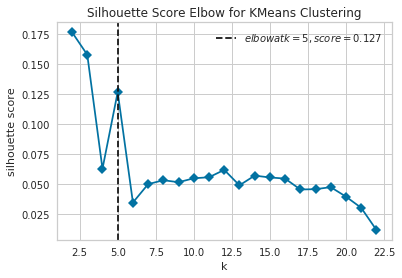

In [65]:
clustering=grouped.drop('Neighborhood', 1)

visualizer = KElbowVisualizer(KMeans(), k=(2,23), metric='silhouette', timings=False)
visualizer.fit(clustering)
visualizer.show() 

In [31]:
# The code was removed by Watson Studio for sharing.

In [66]:
k=5
kmeans=KMeans(n_clusters=k, random_state=0)
kmeans.fit(clustering)

clustered=sorted
clustered.insert(0,'Cluster Labels', kmeans.labels_)

merged=df3
merged=merged.join(sorted.set_index('Neighborhood'), on='Neighborhood')
merged

,Neighborhood,Borough,Neighborhood.Latitude,Neighborhood.Longitude,Cluster Labels,1th Most Common Venue,2th Most Common Venue,3th Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,I,"Buda Castle, Tabán, Gellérthegy, Krisztinaváro...",47.4979,19.0402,1,Hotel,Hungarian Restaurant,Plaza,Scenic Lookout,Pub
1,II,"Adyliget, Budakeszierdő, Budaliget, Csatárka, ...",47.5393,18.9869,3,Park,Tennis Court,Athletics & Sports,Scenic Lookout,Playground
2,III,"Óbuda, Aquincum, Aranyhegy, Békásmegyer, Csill...",47.5672,19.0369,4,Electronics Store,Deli / Bodega,Auto Garage,Mountain,Fast Food Restaurant
3,IV,"Újpest, Megyer, Káposztásmegyer, Székesdűlő, I...",47.5649,19.0913,2,Fast Food Restaurant,Bakery,Dessert Shop,Café,Park
4,V,"Inner City, Lipótváros",47.5002,19.0520,1,Hotel,Italian Restaurant,Plaza,Hungarian Restaurant,Restaurant
5,VI,Terézváros,47.5099,19.0626,2,Italian Restaurant,Ice Cream Shop,Pizza Place,Vietnamese Restaurant,Beer Bar
6,VII,Erzsébetváros,47.5027,19.0734,2,Hotel,Bar,Hungarian Restaurant,Bakery,Beer Bar
7,VIII,"Józsefváros, Kerepesdűlő, Tisztviselőtelep",47.4894,19.0707,2,Italian Restaurant,Hotel,Bar,Electronics Store,Burger Joint
8,IX,"Ferencváros, Gubacsidűlő, József Attila-lakótelep",47.4649,19.0916,2,Furniture / Home Store,Soccer Field,Train Station,Gym / Fitness Center,Multiplex
9,X,"Felsőrákos, Gyárdűlő, Keresztúridűlő, Kőbánya-...",47.4833,19.1573,2,Arts & Entertainment,Pub,Track,Pharmacy,Fast Food Restaurant


In [67]:
import matplotlib.cm as cm
import matplotlib.colors as colors

In [68]:
map=folium.Map(location=[bp_lat, bp_lon], zoom_start=11)

folium.PolyLine(line_points, color='blue', weight=5, opacity=1).add_to(map)

folium.map.Marker(
    [47.5850, 19.0200],
    icon=folium.DivIcon(
        icon_size=(15,15),
        icon_anchor=(0,0),
        html='<b style="font-size: 16pt;">Buda</b>'
        )
    ).add_to(map)
folium.map.Marker(
    [47.5850, 19.0600],
    icon=folium.DivIcon(
        icon_size=(15,15),
        icon_anchor=(0,0),
        html='<b style="font-size: 16pt;">Pest</b>'
        )
    ).add_to(map)

x=np.arange(k)
ys=[i+x+(i*x)**2 for i in range(k)]
colors_array=cm.rainbow(np.linspace(0,1,len(ys)))
rainbow=[colors.rgb2hex(i) for i in colors_array]

markers_colors=[]

for lat, lon, poi, clus in zip(merged['Neighborhood.Latitude'], merged['Neighborhood.Longitude'], merged['Neighborhood'], merged['Cluster Labels']):
    label=folium.Popup(str(poi)+' Cluster '+str(clus), parse_html=True)
    folium.CircleMarker(
        [float(lat), float(lon)], 
        radius=5,
        color=rainbow[clus-1], 
        #popup=label,
        fill=True,
        fill_color=rainbow[clus-1], 
        fill_opacity=0.7).add_to(map)
    folium.Circle(
        [float(lat), float(lon)],
        radius=RADIUS,
        color='green',  
        fill=False).add_to(map)
                                        
map

In [70]:
merged.loc[merged['Cluster Labels']==0, merged.columns[[0]+list(range(k, merged.shape[1]))]]

,Neighborhood,1th Most Common Venue,2th Most Common Venue,3th Most Common Venue,4th Most Common Venue,5th Most Common Venue
10,XI,Bakery,Platform,Hungarian Restaurant,Dessert Shop,Dog Run
11,XII,Platform,Scenic Lookout,Hungarian Restaurant,Dessert Shop,Bakery
19,XX,Bakery,Food & Drink Shop,Park,Plaza,Bed & Breakfast
21,XXII,Bakery,Playground,Plaza,Dessert Shop,Museum
22,XXIII,Bakery,Gun Range,Dessert Shop,Park,Hungarian Restaurant


In [71]:
merged.loc[merged['Cluster Labels']==1, merged.columns[[0]+list(range(k, merged.shape[1]))]]

,Neighborhood,1th Most Common Venue,2th Most Common Venue,3th Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,I,Hotel,Hungarian Restaurant,Plaza,Scenic Lookout,Pub
4,V,Hotel,Italian Restaurant,Plaza,Hungarian Restaurant,Restaurant


In [72]:
merged.loc[merged['Cluster Labels']==2, merged.columns[[0]+list(range(k, merged.shape[1]))]]

,Neighborhood,1th Most Common Venue,2th Most Common Venue,3th Most Common Venue,4th Most Common Venue,5th Most Common Venue
3,IV,Fast Food Restaurant,Bakery,Dessert Shop,Café,Park
5,VI,Italian Restaurant,Ice Cream Shop,Pizza Place,Vietnamese Restaurant,Beer Bar
6,VII,Hotel,Bar,Hungarian Restaurant,Bakery,Beer Bar
7,VIII,Italian Restaurant,Hotel,Bar,Electronics Store,Burger Joint
8,IX,Furniture / Home Store,Soccer Field,Train Station,Gym / Fitness Center,Multiplex
9,X,Arts & Entertainment,Pub,Track,Pharmacy,Fast Food Restaurant
12,XIII,Gym / Fitness Center,Pub,Diner,Park,Electronics Store
13,XIV,Chinese Restaurant,Ice Cream Shop,Bakery,Plaza,Gym / Fitness Center
14,XV,Pizza Place,Pub,Restaurant,Shoe Store,Clothing Store
15,XVI,Pharmacy,Gym / Fitness Center,Sporting Goods Shop,Supermarket,Plaza


In [73]:
merged.loc[merged['Cluster Labels']==3, merged.columns[[0]+list(range(k, merged.shape[1]))]]

,Neighborhood,1th Most Common Venue,2th Most Common Venue,3th Most Common Venue,4th Most Common Venue,5th Most Common Venue
1,II,Park,Tennis Court,Athletics & Sports,Scenic Lookout,Playground


In [74]:
merged.loc[merged['Cluster Labels']==4, merged.columns[[0]+list(range(k, merged.shape[1]))]]

,Neighborhood,1th Most Common Venue,2th Most Common Venue,3th Most Common Venue,4th Most Common Venue,5th Most Common Venue
2,III,Electronics Store,Deli / Bodega,Auto Garage,Mountain,Fast Food Restaurant
